In [1]:
import pandas as pd

df = pd.read_csv('insurance_claims_cleaned_fixed.csv', dtype={'column_name': 'string'})

We will be looking at hour of the day, insured occupation, insured education level, and insured hobbies as they relate to fraud reported

#lets first get some info on insured hour of the day as it relates to fraud reported

In [8]:
counts = df.groupby('fraud_reported')['number_of_vehicles_involved'].value_counts()
print(counts)

fraud_reported  number_of_vehicles_involved
No              1                              448
                3                              264
                2                               21
                4                               20
Yes             1                              133
                3                               94
                4                               11
                2                                9
Name: count, dtype: int64


In [9]:
df.groupby('fraud_reported')['number_of_vehicles_involved'].value_counts(normalize=True)

fraud_reported  number_of_vehicles_involved
No              1                              0.594954
                3                              0.350598
                2                              0.027888
                4                              0.026560
Yes             1                              0.538462
                3                              0.380567
                4                              0.044534
                2                              0.036437
Name: proportion, dtype: float64

<Figure size 1000x600 with 0 Axes>

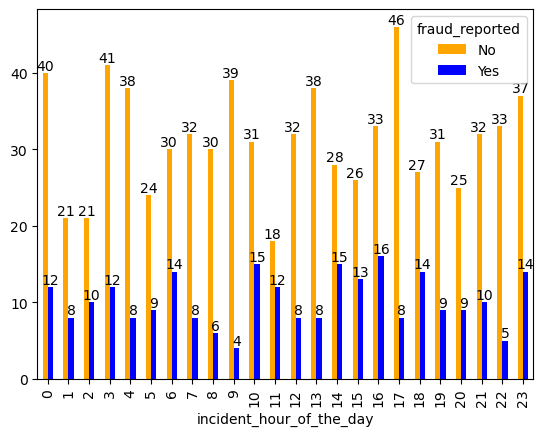

In [14]:
import matplotlib.pyplot as plt

# lets plot hour of the day against fraud reported
plt.figure(figsize=(10,6))

ax = df.groupby('fraud_reported')['incident_hour_of_the_day'].value_counts().unstack().T.plot(kind='bar', stacked=False, color =['orange', 'blue'])

for container in ax.containers:
    ax.bar_label(container)

## Summary: Number of Vehicles Involved

• **Single Vehicle**: Non-fraud more common (59.5% vs 53.8%)
• **Multi-Vehicle**: Fraud favors 3+ vehicles (42.6% vs 37.8% combined)
• **Pattern**: Fraudulent claims involve more complex scenarios with multiple vehicles
• **Insight**: Fraudsters may fabricate elaborate accidents believing they justify higher payouts